### Formatted tweets analysis

#### Date: 14/03/2019
- Read the dataframe produced by <code>tweets_processor</code>
- Extract meaningful information
- Write results to file

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/dataframe_formatted_results.csv")

In [3]:
df

,u_name,u_screen_name,t_date,t_text,t_polarity_score,t_polarity,t_subjectivity_score,u_followers,t_retweets,t_favorited,t_mentions
0,Dr Keith Grimes,keithgrimes,12/03/2019,"@cpeedell @marcus_baw @babylonhealth HI Clive,...",0.450000,Neutral,0.700000,5499,0,1,"Clive Peedell (cpeedell), Dr Marcus Baw (marcu..."
1,Sam Dowling,saminus,12/03/2019,As we near the end of our @LondonwideLMCs annu...,0.200000,Negative,0.341667,1417,2,3,"Londonwide LMCs (LondonwideLMCs), Jackieappleb..."
2,Londonwide LMCs,LondonwideLMCs,12/03/2019,We are now on to our third and final long anti...,-0.012500,Negative,0.350000,2076,1,1,"Elliott (ElliottSinger), Jackieapplebeeturner ..."
3,Mark Barley,Chronotrope,12/03/2019,@DrSelvarajah @DrMurphy11 @babylonhealth I mea...,-0.312500,Negative,0.687500,353,0,0,"Selvaseelan Selvarajah (DrSelvarajah), Dr Murp..."
4,Mark Barley,Chronotrope,12/03/2019,@DrSelvarajah @DrMurphy11 @babylonhealth I’d l...,-0.100000,Negative,0.100000,353,0,1,"Selvaseelan Selvarajah (DrSelvarajah), Dr Murp..."
5,Shaun Lintern,ShaunLintern,12/03/2019,Hosting @babylonhealth GP at Hand app could le...,-0.125000,Negative,0.375000,24674,3,3,"Babylon (babylonhealth), Ben Heather (BHeather..."
6,💣 Medical Devices Expert,JoanneD_,12/03/2019,@Meddev_guy @DrMurphy11 @babylonhealth @MHRAde...,0.000000,Negative,0.000000,466,0,0,"Meddev Guy (Meddev_guy), Dr Murphy (DrMurphy11..."
7,SHugar,SusiHarris,12/03/2019,@vanessafrank3 @kieran_walshe @JonAshworth @ba...,0.700000,Neutral,0.600000,48,0,0,"vanessa frank (vanessafrank3), Kieran Walshe (..."
8,Meddev Guy,Meddev_guy,12/03/2019,@JoanneD_ @DrMurphy11 @babylonhealth @MHRAdevi...,0.000000,Negative,0.000000,8,0,0,"Medical Devices Expert 🎳 (JoanneD_), Dr Murphy..."
9,michelle drage,michelledrage,12/03/2019,@RossLydall @LondonwideLMCs @bengoldacre @baby...,0.800000,Positive,1.000000,3646,0,2,"Ross Lydall (RossLydall), Londonwide LMCs (Lon..."


In [4]:
dates = df['t_date'].unique()
dates.sort()
range_dates = dates[0] + " - " + dates[-1]

In [5]:
most_active_overall = df['u_screen_name'].mode()[0]

In [6]:
df.groupby(['t_polarity','u_screen_name'], as_index=False)#['u_screen_name'].max()

In [7]:
most_neg_user = df.loc[df['t_polarity'] == "Negative"].groupby(['u_screen_name']).size().idxmax()
most_pos_user = df.loc[df['t_polarity'] == 'Positive'].groupby(['u_screen_name']).size().idxmax()

In [8]:
most_neg_tweet = df.iloc[df['t_polarity_score'].idxmin()]

In [9]:
most_pos_tweet = df.iloc[df['t_polarity_score'].idxmax()]

In [10]:
avg_neg_polarity = df.loc[df['t_polarity'] == 'Negative']['t_polarity_score'].mean()

In [11]:
avg_pos_polarity = df.loc[df['t_polarity'] == "Positive"]['t_polarity_score'].mean()

In [12]:
percentages = df['t_polarity'].value_counts(normalize=True) * 100

 #### capturing cell content, to write to file

In [13]:
%%capture cap --no-stderr
print("Time frame: {}\n".format(range_dates))
print("Most active user: {}\n".format(most_active_overall))
print("User with most negative tweets: {}\n".format(most_neg_user))
print("User with most positive tweets: {}\n".format(most_pos_user))
print("Most negative tweet")
print(most_neg_tweet[['t_polarity_score', 't_polarity', 'u_screen_name']])
print("Tweet: {}\n".format(most_neg_tweet['t_text']))
print("Most positive tweet")
print(most_pos_tweet[['t_polarity_score', 't_polarity', 'u_screen_name']])
print("Tweet: {}\n".format(most_pos_tweet['t_text']))
print("Percentages of tweets by polarity")
print(percentages)
print("Average negative polarity: {}\n".format(avg_neg_polarity))
print("Average positive polarity: {}\n".format(avg_pos_polarity))

In [14]:
filename = range_dates.replace(" - ", "_").replace("/", "") + ".txt"
print(filename)
with open("../data/" + filename, 'w') as f:
    f.write(cap.stdout)

03032019_12032019.txt


### Visualistion

- Order users by number of negative tweets
- Order users by number of positive tweets
- Percentage of neg/neutral/pos tweets

In [28]:
neg_polarity_df = df.loc[df['t_polarity'] == 'Negative'][['u_screen_name', 't_polarity']]
sorted_neg_users = neg_polarity_df.groupby('u_screen_name').count().sort_values(
    by="t_polarity", ascending=False)
sorted_neg_users.reset_index(level=0, inplace=True)


In [29]:
sorted_neg_users

,u_screen_name,t_polarity
0,EmergMedDr,15
1,DrMurphy11,15
2,ClaireLSutton,12
3,dave_dlt,11
4,whiterose_lady,11
5,bendean1979,9
6,JoanneD_,8
7,LeaMerone,6
8,DanielBayley80,5
9,wellesleytales,5


In [16]:
names = sorted_neg_users

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')

In [32]:
def plot_horiz_bars(data, limit):
    f, ax = plt.subplots(figsize=(6, 15))
    data = data.head(limit)
    clrs = ['silver' if (x < max(data['t_polarity'])) else 'red' for x in data['t_polarity']]

    sns.barplot(x="t_polarity", y="u_screen_name", data=data,
            label="#tweets", palette=clrs)

    # Add a legend and informative axis label
    ax.legend(ncol=2, loc="lower right", frameon=True)
    ax.set(xlim=(0, max(data['t_polarity'])+1), ylabel="",
           xlabel="Number of negative tweets per user (50 users)")
    sns.despine(left=True, bottom=True)

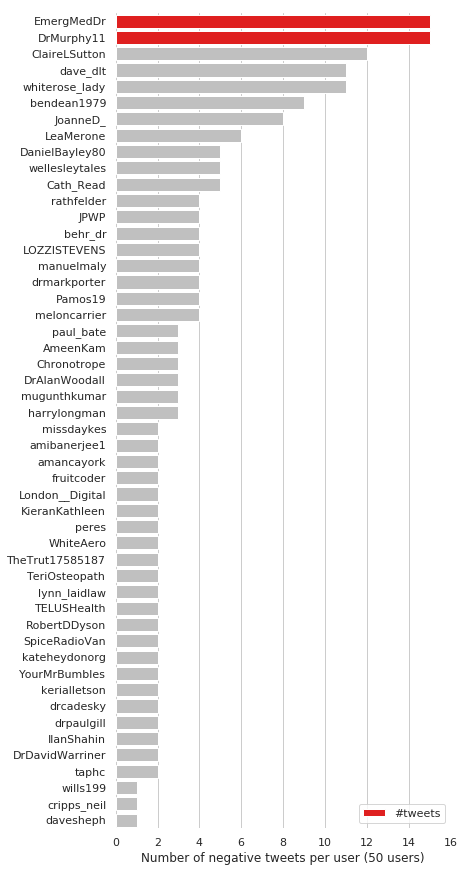

In [33]:
plot_horiz_bars(sorted_neg_users, 50)